In [36]:
from pathlib import Path
import xml.etree.ElementTree as ET

folder = Path("data/nyt_xml_test")
xml_files = list(folder.glob("*.xml"))

print(f"Found {len(xml_files)} XML files.")



Found 25000 XML files.


In [3]:
# Load one file
sample_file = xml_files[0]
print(f"Reading {sample_file}")

tree = ET.parse(sample_file)
root = tree.getroot()




Reading data/nyt_xml_test/93109163.xml


In [30]:
print_all(sample_file)

Record {} None
Version {} Record_v1.0.xsd
RecordID {} 93109163
DateTimeStamp {} 20170401155238
ActionCode {} change
RecordTitle {} Classified Ad 6 -- No Title
Publication {} None
PublicationID {} 55428
Title {} New York Times  (1857-1922)
Qualifier {} New York, N.Y.
Publisher {} New York Times Company
AlphaPubDate {} Mar 12, 1871
NumericPubDate {} 18710312
SourceType {} Historical Newspapers
ObjectType {} Classified Advertisement
ObjectType {} Advertisement
LanguageCode {} ENG
ISSN {} 03624331
StartPage {} 7
Pagination {} 7
URLDocView {} http://search.proquest.com/docview/93109163/
Products {} None
Product {} None
ProductID {} 1005685
HasFullText {} true
Product {} None
ProductID {} 1006358
HasFullText {} true
Product {} None
ProductID {} 1006544
HasFullText {} true
Product {} None
ProductID {} 1007155
HasFullText {} true
Product {} None
ProductID {} 1007618
HasFullText {} true
Product {} None
ProductID {} 1007859
HasFullText {} true
Product {} None
ProductID {} 1008939
HasFullText {} 

In [32]:
#iterates through files and creates a list of unique values for ObjectType tag
def ObjectType_list(folder_path):
    folder = Path(folder_path)
    xml_files = list(folder.glob("*.xml"))
    object_types = set()

    for xml_file in xml_files:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        
        for obj_type in root.iter('ObjectType'):
            object_types.add(obj_type.text)

    return list(object_types)
unique_object_types = ObjectType_list("data/nyt_xml_test")
print("Unique ObjectType values:", unique_object_types)

Unique ObjectType values: ['Credit/Acknowledgement', 'Letter to the Editor', 'News', 'Editorial', 'Front Page/Cover Story', 'Table of Contents', 'Correspondence', 'Stock Quote', 'Feature', 'Image/Photograph', 'Legal Notice', 'Marriage Announcement', 'Review', 'Classified Advertisement', 'Front Matter', 'Undefined', 'Commentary', 'Obituary', 'Advertisement', 'Article', 'Birth Notice', 'General Information']


In [5]:
# Print top-level tags to see structure
for child in root:
    print(child.tag, child.attrib)



Version {}
RecordID {}
DateTimeStamp {}
ActionCode {}
RecordTitle {}
Publication {}
Publisher {}
AlphaPubDate {}
NumericPubDate {}
SourceType {}
ObjectType {}
ObjectType {}
LanguageCode {}
ISSN {}
StartPage {}
Pagination {}
URLDocView {}
Products {}
FullText {}


In [6]:
#print every element in the xml file
def print_all(file):
    tree = ET.parse(file)
    root = tree.getroot()
    for elem in root.iter():
        print(elem.tag, elem.attrib, elem.text)

In [7]:
print_all(xml_files[24031])

Record {} None
Version {} Record_v1.0.xsd
RecordID {} 95945345
DateTimeStamp {} 20170401155618
ActionCode {} change
RecordTitle {} VIRGINIA STATE HOUSE ROW.
Publication {} None
PublicationID {} 55428
Title {} New York Times  (1857-1922)
Qualifier {} New York, N.Y.
Publisher {} New York Times Company
AlphaPubDate {} Mar 3, 1900
NumericPubDate {} 19000303
SourceType {} Historical Newspapers
ObjectType {} Feature
ObjectType {} Article
Contributor {} None
ContribRole {} Author
OriginalForm {} Special to The New York Times.
LanguageCode {} ENG
ISSN {} 03624331
StartPage {} 2
Pagination {} 2
URLDocView {} http://search.proquest.com/docview/95945345/
Products {} None
Product {} None
ProductID {} 1005685
HasFullText {} true
Product {} None
ProductID {} 1006358
HasFullText {} true
Product {} None
ProductID {} 1006544
HasFullText {} true
Product {} None
ProductID {} 1007155
HasFullText {} true
Product {} None
ProductID {} 1007618
HasFullText {} true
Product {} None
ProductID {} 1007859
HasFullTe

In [8]:
# Extract text of an article if available
texts = []
for block in root.findall(".//FullText"):  
    texts.append(block.text)

article_text = "\n".join([t for t in texts if t])
print(article_text[:5000])  # first 5k chars

                                                                                                REAL  AT AUCTIOi:.                    AI) H. , Auctioneer.                 120 CgNTBAL  LO TA AT AUCTION. BY ORDER OF EgECUTRIg.                   ADIiL4N H. , P. R. WILgINB & CO. will sell at unction, on , March 23, 187t, at 12 o clock, at the Ezchange 8alea-room, No, 1 1 Broadway,                 BY ORDER Op"h$E" > '               P          NEUR MORRIS , DECEASIrD,                 120 LOTS, COMPRISING THE TWb ENTIRE  BOUNDED BY CENTRAL PARg, (3T. -AP., ?TH-AV. BOULEVARD, , , AND 112TH 8.                 SEVENTY PER CENT. I,IAY REMAIN ON BOND AND 1.                 Maya at the office o! the , No. 7 Pine-et., and of B. PAN RENSSELAER CRUGER, Esq., No.182 Grand-at.                 JAB A. FtsusY Anettoneer and Real Estate          , No. 10 Pine-at. f AUCTION       OIf GITIaTTHEfII                  TATS, IN JAMAICA, L. L-SALE              .-The splendid country residence of the Iate C. G. Gnnt

In [9]:
# Extract Headline
texts = []
for block in root.findall(".//RecordTitle"):  
    texts.append(block.text)

headline = "\n".join([t for t in texts if t])
print(headline)

Classified Ad 6 -- No Title


In [10]:
# Extract NumericPubDate
texts = []
for block in root.findall(".//NumericPubDate"): 
    texts.append(block.text)

article_text = "\n".join([t for t in texts if t])
print(article_text[:5000])  # first 5k chars

18710312


In [11]:
# a function that takes a position in sample_file and returns the AlphaPubDate and first 5000 chars of FullText
def extract_info(sample_file):
    tree = ET.parse(sample_file)
    root = tree.getroot()

    # Extract AlphaPubDate
    alpha_pub_date = ""
    alpha_pub_date_elem = root.find(".//AlphaPubDate")
    if alpha_pub_date_elem is not None:
        alpha_pub_date = alpha_pub_date_elem.text

    # Extract FullText
    texts = []
    for block in root.findall(".//RecordTitle"):  # or ".//body" depending on schema
        texts.append(block.text)
    article_text = "\n".join([t for t in texts if t])

        # Extract FullText
    texts = []
    for block in root.findall(".//FullText"):  # or ".//body" depending on schema
        texts.append(block.text)
    article_text = "\n".join([t for t in texts if t])

    return alpha_pub_date, article_text[:5000]  # return first 5k chars

In [12]:
extract_info(xml_files[0])

('Mar 12, 1871',
 '                                                                                                REAL  AT AUCTIOi:.                    AI) H. , Auctioneer.                 120 CgNTBAL  LO TA AT AUCTION. BY ORDER OF EgECUTRIg.                   ADIiL4N H. , P. R. WILgINB & CO. will sell at unction, on , March 23, 187t, at 12 o clock, at the Ezchange 8alea-room, No, 1 1 Broadway,                 BY ORDER Op"h$E" > \'               P          NEUR MORRIS , DECEASIrD,                 120 LOTS, COMPRISING THE TWb ENTIRE  BOUNDED BY CENTRAL PARg, (3T. -AP., ?TH-AV. BOULEVARD, , , AND 112TH 8.                 SEVENTY PER CENT. I,IAY REMAIN ON BOND AND 1.                 Maya at the office o! the , No. 7 Pine-et., and of B. PAN RENSSELAER CRUGER, Esq., No.182 Grand-at.                 JAB A. FtsusY Anettoneer and Real Estate          , No. 10 Pine-at. f AUCTION       OIf GITIaTTHEfII                  TATS, IN JAMAICA, L. L-SALE              .-The splendid country residence of

In [13]:
extract_info(xml_files[20000])

('May 13, 1866',
 '                                                                                                R.   ON -A  to young men, contaInIng information never  , CaD bo had froo of ell" lit the di ug-store, 12\' , floway, -9t., or by"I losing Vol no. i, I ,-", "Awy- ciy.                 SHIPPING.                 ..........                 THE SOUTH AN) LLOYDe Only AmeriuM ns Of  An  be.                 tween ZjHW-YO K RuMBNOM                  glass ,on 0 to                 the U. S. M - ger                 9.1119.e and Germs low-York, from                 46Nortb 149,?r n                 Merrimac B. VIAN  der, 2,600                 tone, jil borne power ................. !.... I ... 17th                 Lric"on, LoNvBjh, 0omm& ider, 2,200 tons, 600 horse ower .......................... bki_..2411lh MAY.                 \', & , co                 1,600  power.- may.                 Ballic A. G. JoNEBb; June.                 th June.                 BE                 r.......

In [14]:
#function that goes through a range of 100 xml files and prints the AlphaPubDate
for i in range(100):
    alpha_pub_date, article_snippet = extract_info(xml_files[i])
    print(f"File {i}: AlphaPubDate: {alpha_pub_date}")


File 0: AlphaPubDate: Mar 12, 1871
File 1: AlphaPubDate: Oct 16, 1862
File 2: AlphaPubDate: Jan 5, 1885
File 3: AlphaPubDate: Mar 17, 1881
File 4: AlphaPubDate: Dec 30, 1879
File 5: AlphaPubDate: Jul 1, 1885
File 6: AlphaPubDate: Nov 7, 1894
File 7: AlphaPubDate: Oct 25, 1871
File 8: AlphaPubDate: Aug 31, 1890
File 9: AlphaPubDate: Jul 5, 1876
File 10: AlphaPubDate: Dec 8, 1885
File 11: AlphaPubDate: May 19, 1875
File 12: AlphaPubDate: May 26, 1895
File 13: AlphaPubDate: Jul 2, 1878
File 14: AlphaPubDate: Jul 11, 1890
File 15: AlphaPubDate: Jan 2, 1891
File 16: AlphaPubDate: May 4, 1883
File 17: AlphaPubDate: Aug 28, 1883
File 18: AlphaPubDate: Sep 26, 1878
File 19: AlphaPubDate: Sep 6, 1881
File 20: AlphaPubDate: Feb 7, 1869
File 21: AlphaPubDate: May 14, 1874
File 22: AlphaPubDate: Sep 3, 1893
File 23: AlphaPubDate: Nov 25, 1888
File 24: AlphaPubDate: Oct 11, 1873
File 25: AlphaPubDate: Jan 18, 1873
File 26: AlphaPubDate: Jul 31, 1897
File 27: AlphaPubDate: Dec 16, 1879
File 28: Alph

In [15]:
#function that looks at NumericPubDate and groups files by decade
from collections import defaultdict
decade_dict = defaultdict(list)
for i in range(25000):
    tree = ET.parse(xml_files[i])
    root = tree.getroot()
    numeric_pub_date_elem = root.find(".//NumericPubDate")
    if numeric_pub_date_elem is not None:
        numeric_pub_date = numeric_pub_date_elem.text
        if len(numeric_pub_date) >= 4:
            decade = numeric_pub_date[:3] + "0s"
            decade_dict[decade].append(xml_files[i])

In [16]:
#function that iterates over each file in a decade and does a word count of the word "utopia" in FullText and RecordTitle of that decade and takes a note of which files the word appears in
def word_count_in_decade(decade_files, word="utopia"):
    count = 0
    files_with_word = []
    for file in decade_files:
        tree = ET.parse(file)
        root = tree.getroot()
        texts = []
        for block in root.findall(".//FullText"):
            texts.append(block.text)
        for block in root.findall(".//RecordTitle"):
            texts.append(block.text)
        article_text = "\n".join([t for t in texts if t])
        word_count = article_text.lower().count(word.lower())
        if word_count > 0:
            count += word_count
            files_with_word.append(file)
    return count, files_with_word

In [17]:
#runs word_count_in_decade for each decade and prints the results
for decade, files in decade_dict.items():
    count, files_with_word = word_count_in_decade(files, word="utopia")
    print(f"Decade: {decade}, Count of 'utopia': {count}, Files with 'utopia': {len(files_with_word)}")


Decade: 1870s, Count of 'utopia': 5, Files with 'utopia': 5
Decade: 1860s, Count of 'utopia': 0, Files with 'utopia': 0
Decade: 1880s, Count of 'utopia': 6, Files with 'utopia': 6
Decade: 1890s, Count of 'utopia': 4, Files with 'utopia': 4
Decade: 1850s, Count of 'utopia': 0, Files with 'utopia': 0
Decade: 1900s, Count of 'utopia': 0, Files with 'utopia': 0
Decade: 1910s, Count of 'utopia': 0, Files with 'utopia': 0


In [18]:
#creates a list of all the files where the word "utopia" appears in FullText or RecordTitle
utopia_files = []
for decade, files in decade_dict.items():
    _, files_with_word = word_count_in_decade(files, word="utopia")
    utopia_files.extend(files_with_word)

In [19]:
extract_info(utopia_files[2])

('Jul 28, 1875',
 '                                                                                                SHIPPING  LIRE B. & N. A. R. M. S_ P, CO.                 NOTICE. With the view of diminishing the chances of collision the  of this Iine tape s  course ibr sib  of the year.                 On the outward passage Srom Queenatowa to New: Tork   of 5U at 43 latitude, ornothing to the  of 43.                 On the homeward  ,.          the  of  at 43. or nothing ..o the north of!!.                 slaw Toaa tMa . e:ta . . CHINA -....BAT..Jnly 31\'__WED.. Ang. 11 RUSSIA-...... Acts 4_.WED.. Anq. 18                 6         marked  do not carp  , Labia passage, $80 $100, and 13U, go   according to accommodation.    on  terms.                 Steerage tickets to and !from au parlor of Ettrotte at entreat rates. Freight and cabin once No. 4 Bowling  . Steersga o>$ce. No. ill         .  Building.) CHAS. G. . Afeettt. P,OH Lll\'IS,SPOOL,                 Qneenetown,) CARTING THE 

In [20]:
#chooses 100 random files from xml files
import random
random_files = random.sample(xml_files, 100)

In [21]:
#function that takes in a list of files and returns an average token length for the FullText field
from gensim.utils import simple_preprocess
def average_token_length(file_list):
    total_tokens = 0
    total_files = 0
    for file in file_list:
        tree = ET.parse(file)
        root = tree.getroot()
        texts = []
        for block in root.findall(".//FullText"):
            texts.append(block.text)
        article_text = "\n".join([t for t in texts if t])
        tokens = simple_preprocess(article_text)
        total_tokens += len(tokens)
        total_files += 1
    if total_files == 0:
        return 0
    return total_tokens / total_files

In [22]:
average_token_length(random_files)

585.51

/home/josh/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


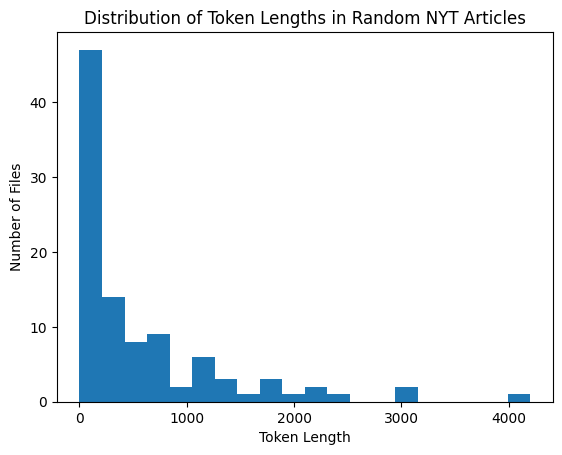

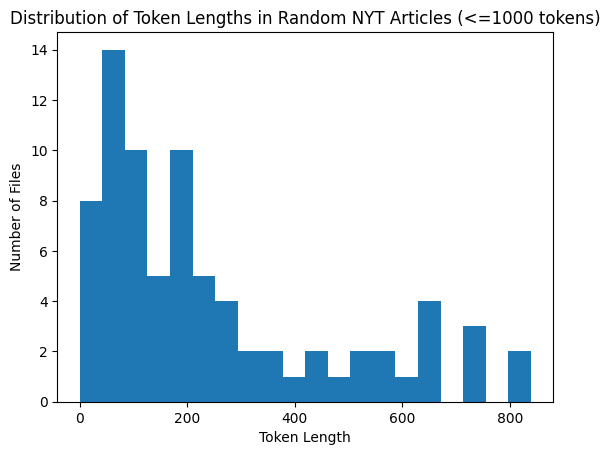

In [23]:
#visualize the distribution of token lengths across these 100 files using matplotlib
import matplotlib.pyplot as plt
token_lengths = []
for file in random_files:
    tree = ET.parse(file)
    root = tree.getroot()
    texts = []
    for block in root.findall(".//FullText"):
        texts.append(block.text)
    article_text = "\n".join([t for t in texts if t])
    tokens = simple_preprocess(article_text)
    token_lengths.append(len(tokens))
plt.hist(token_lengths, bins=20)
plt.xlabel("Token Length")
plt.ylabel("Number of Files")
plt.title("Distribution of Token Lengths in Random NYT Articles")
plt.show()

#plots again but disregards all files over 1000 tokens
filtered_token_lengths = [length for length in token_lengths if length <= 1000]
plt.hist(filtered_token_lengths, bins=20)
plt.xlabel("Token Length")
plt.ylabel("Number of Files")
plt.title("Distribution of Token Lengths in Random NYT Articles (<=1000 tokens)")
plt.show()

In [24]:
#checks percentage of tokens that are recognized as English words using nltk corpus
import nltk
from nltk.corpus import words
nltk.download('words')
english_words = set(words.words())
def english_word_percentage(file_list):
    total_tokens = 0
    english_token_count = 0
    for file in file_list:
        tree = ET.parse(file)
        root = tree.getroot()
        texts = []
        for block in root.findall(".//FullText"):
            texts.append(block.text)
        article_text = "\n".join([t for t in texts if t])
        tokens = simple_preprocess(article_text)
        total_tokens += len(tokens)
        english_token_count += sum(1 for token in tokens if token in english_words)
    if total_tokens == 0:
        return 0
    return (english_token_count / total_tokens) * 100
english_word_percentage(random_files)

[nltk_data] Downloading package words to /home/josh/nltk_data...
[nltk_data]   Package words is already up-to-date!


73.69814349883008

In [35]:
#runs english_word_percentage on all files that do not have Classified Advertisement as ObjectType
non_ad_files = []
for file in xml_files:
    tree = ET.parse(file)
    root = tree.getroot()
    object_type_elem = root.find(".//ObjectType")
    if object_type_elem is not None and object_type_elem.text != "Classified Advertisement":
        non_ad_files.append(file)
english_word_percentage(non_ad_files)

75.42951403732485

In [26]:
"""
#builds a static word embedding model from all the RecordTitle and FullText fields in the decades 1870s and earlier, and another 1880s and later using gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import itertools
documents_1870s_earlier = []
documents_1880s_later = []
for decade, files in decade_dict.items():
    for file in files:
        tree = ET.parse(file)
        root = tree.getroot()
        texts = []
        for block in root.findall(".//FullText"):
            texts.append(block.text)
        for block in root.findall(".//RecordTitle"):
            texts.append(block.text)
        article_text = "\n".join([t for t in texts if t])
        tokens = simple_preprocess(article_text)
        if decade <= "1870s":
            documents_1870s_earlier.append(tokens)
        else:
            documents_1880s_later.append(tokens)
"""


'\n#builds a static word embedding model from all the RecordTitle and FullText fields in the decades 1870s and earlier, and another 1880s and later using gensim\nfrom gensim.models import Word2Vec\nfrom gensim.utils import simple_preprocess\nimport itertools\ndocuments_1870s_earlier = []\ndocuments_1880s_later = []\nfor decade, files in decade_dict.items():\n    for file in files:\n        tree = ET.parse(file)\n        root = tree.getroot()\n        texts = []\n        for block in root.findall(".//FullText"):\n            texts.append(block.text)\n        for block in root.findall(".//RecordTitle"):\n            texts.append(block.text)\n        article_text = "\n".join([t for t in texts if t])\n        tokens = simple_preprocess(article_text)\n        if decade <= "1870s":\n            documents_1870s_earlier.append(tokens)\n        else:\n            documents_1880s_later.append(tokens)\n'

In [27]:
# Train Word2Vec models
#model_1870s_earlier = Word2Vec(sentences=documents_1870s_earlier, vector_size=100, window=5, min_count=2, workers=4)
#model_1880s_later = Word2Vec(sentences=documents_1880s_later, vector_size=100, window=5, min_count=2, workers=4)


In [28]:
# Save models
#model_1870s_earlier.save("models/word2vec_1870s_earlier.model")
#model_1880s_later.save("models/word2vec_1880s_later.model")


In [29]:
#loads the two models and finds the top 10 most similar words to "utopia" in each model
model_1870s_earlier = Word2Vec.load("models/word2vec_1870s_earlier.model")
model_1880s_later = Word2Vec.load("models/word2vec_1880s_later.model")
similar_1870s_earlier = model_1870s_earlier.wv.most_similar("france", topn=10)
similar_1880s_later = model_1880s_later.wv.most_similar("france", topn=10)
print("Top 10 similar words to 'utopia' in 1870s and earlier model:")
for word, score in similar_1870s_earlier:
    print(f"{word}: {score}")
print("\nTop 10 similar words to 'utopia' in 1880s and later model:")
for word, score in similar_1880s_later:
    print(f"{word}: {score}")  

NameError: name 'Word2Vec' is not defined